# Clustering
Cluster analysis is a machine learning technique, which groups the unlabelled dataset. It can be defined as "A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group."

# K Means Cluster

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.
K-means Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed. K, here is the pre-defined number of clusters to be formed by the Algorithm. If K=3, It means the number of clusters to be formed from the dataset is 3.


## Dataset:
Mall Customer
### About the data set:
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income, and spending score. A spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
df.shape

(200, 5)

For the above, we can observe that there are 200 rows in each of the features and there are no null values in the dataset. The data types in the data set are int and object.
We are checking the unique value in the object data type feature and can see there are 2 unique features. We then perform label encoding that converts categorical variables into an integer. We can observe in the below snapshot that the feature is converted to binary.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# view the labels in the variable
print(df['Genre'].unique())
print("Number of labels in the feature:",len(df['Genre'].unique()))

['Male' 'Female']
Number of labels in the feature: 2


In [7]:
#Declare feature vector and target variable 
y= df['Genre']

In [8]:
#Convert categorical variable into integers by label encoding\
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
y = le.transform(y)

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Use elbow method to find optimal number of clusters 

The elbow method is used to determine the optimal number of clusters in K-means clustering.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


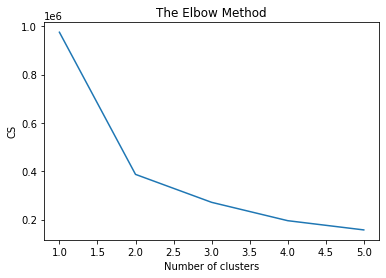

In [10]:
from sklearn.cluster import KMeans
cs = []
for i in range(1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1,6), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

##### By the above plot, we can see that there is a kink at k=2.
###### Hence k=2 can be considered a good number of the cluster to cluster this data.

We have plotted a scattered graph of Annual Income(k$) Vs Spending Score (1-100) and Age Vs Spending Score (1-100).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Annual Income (k$) Vs Spending Score (1-100) ')

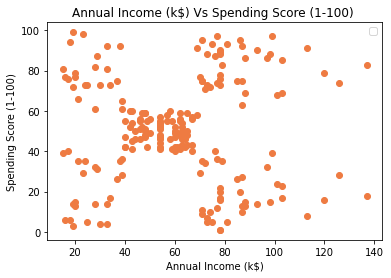

In [11]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='#EE7B42')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Annual Income (k$) Vs Spending Score (1-100) ')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Age Vs Spending Score (1-100) ')

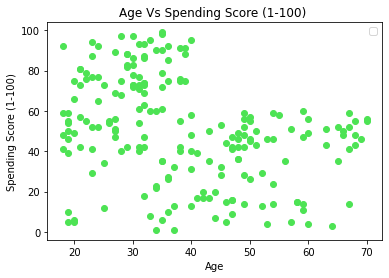

In [12]:
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='#4DE354')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Age Vs Spending Score (1-100) ')

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(df)
labels=kmeans.labels_

print("Clusters: ",labels)

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Clusters:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Result: 93 out of 200 samples were correctly labeled.
Accuracy score: 0.47


#### So, our weak unsupervised classification model achieved a classification accuracy of 47%.

In [14]:
#adding which cluster column to each of the row in dataset
df['cluster1'] = labels
df.head(80)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster1
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
75,76,1,26,54,54,1
76,77,0,45,54,53,1
77,78,1,40,54,48,1
78,79,0,23,54,52,1


In [15]:
# view the labels in the variable
print(df['cluster1'].unique())
print("Number of labels in the feature:",len(df['cluster1'].unique()))

[1 0]
Number of labels in the feature: 2


In [16]:
df11 = df[df.cluster1==0]
df12 = df[df.cluster1==1]
#df13 = df[df.cluster1==2]

In [17]:
#Inertia is not a normalized metric.
#The lower values of inertia are better and zero is optimal.
kmeans.inertia_

387065.71377137717

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Clustering without feacture scaling')

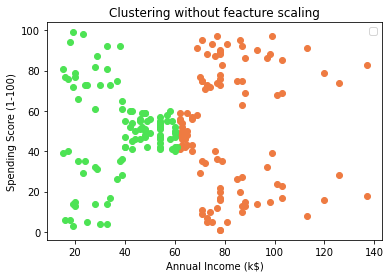

In [18]:
plt.scatter(df11['Annual Income (k$)'],df11['Spending Score (1-100)'],color='#EE7B42')
plt.scatter(df12['Annual Income (k$)'],df12['Spending Score (1-100)'],color='#4DE354')
#plt.scatter(df13['Annual Income (k$)'],df13['Spending Score (1-100)'],color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Clustering without feacture scaling')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Clustering without feacture scaling')

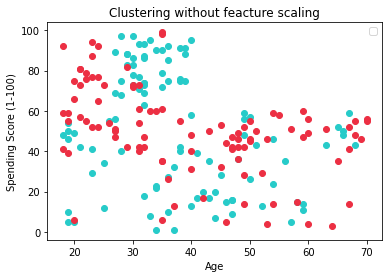

In [19]:
plt.scatter(df11['Age'],df11['Spending Score (1-100)'],color='#27CBC9')
plt.scatter(df12['Age'],df12['Spending Score (1-100)'],color='#EC2F43')
#plt.scatter(df13['Age'],df13['Spending Score (1-100)'],color='red')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Clustering without feacture scaling')

We have plotted a scattered graph of Annual Income(k$) Vs Spending Score (1-100) and Age Vs Spending Score (1-100) after performing k means on the data where K is 2, so we can see that the data clustered into two groups.

We will perform feature scaling on our data to handle highly varying magnitudes or values or units. We have used MinMaxScaler to perform feature scaling and the observe the below data after it.

In [20]:
#features scaling 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)']=scaler.transform(df[['Annual Income (k$)']])
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']=scaler.transform(df[['Spending Score (1-100)']])

In [21]:
print("\nData Set after feature scaling")
df.head()


Data Set after feature scaling


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster1
0,1,1,19,0.000000,0.387755,1
1,2,1,21,0.000000,0.816327,1
2,3,0,20,0.008197,0.051020,1
3,4,0,23,0.008197,0.775510,1
4,5,0,31,0.016393,0.397959,1


In [22]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

labels1=km.labels_

print("Clusters: ",labels1)

correct_labels1 = sum(y == labels1)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels1, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels1/float(y.size)))

Clusters:  [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Result: 103 out of 200 samples were correctly labeled.
Accuracy score: 0.52


So, after feature scaling our weak unsupervised classification K means model achieved a classification accuracy of 52% as seen below with a number of clusters is 2.

In [23]:
df['cluster2'] = y_predicted

In [24]:
df21 = df[df.cluster2==0]
df22 = df[df.cluster2==1]
#df23 = df[df.cluster2==2]

We have plotted a scattered graph of Annual Income(k$) Vs Spending Score (1-100) and Age Vs Spending Score (1-100) after performing k means on the data where K is 2, so we can see that the data clustered into two groups.

Text(0.5, 1.0, 'Clustering with feacture scaling')

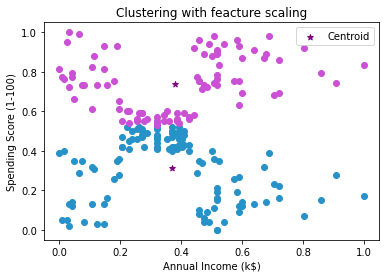

In [25]:
plt.scatter(df21['Annual Income (k$)'],df21['Spending Score (1-100)'],color='#2792C7')
plt.scatter(df22['Annual Income (k$)'],df22['Spending Score (1-100)'],color='#CA50D4')
#plt.scatter(df23['Annual Income (k$)'],df23['Spending Score (1-100)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Clustering with feacture scaling')

Text(0.5, 1.0, 'Clustering with feacture scaling')

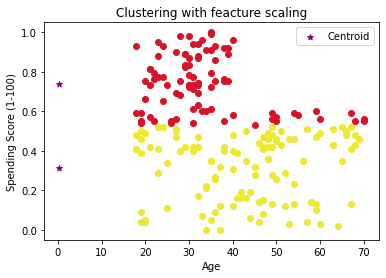

In [26]:
plt.scatter(df21['Age'],df21['Spending Score (1-100)'],color='#ECE92F')
plt.scatter(df22['Age'],df22['Spending Score (1-100)'],color='#DA1227')
#plt.scatter(df23['Age'],df23['Spending Score (1-100)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Clustering with feacture scaling')

In [27]:
kmeans.cluster_centers_

array([[150.        ,   0.47524752,  37.77227723,  81.35643564,
         50.45544554],
       [ 50.        ,   0.4040404 ,  39.94949495,  39.34343434,
         49.93939394]])

In [28]:
clusters = []
inertia_vals = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 6, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=10)
    model.fit(df)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called centroids. 
The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of the squared criterion.

Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value Note: Cluster number and intra-cluster distance are appended for plotting the elbow curve.
The silhouette coefficient or silhouette score k means is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).


In [29]:
from sklearn.metrics import silhouette_score
for i in range(1,5,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(df, clusters[i].predict(df)))

---------------------------------------
KMeans(n_clusters=2, random_state=10)
Silhouette score: 0.5716336983507557
---------------------------------------
KMeans(n_clusters=3, random_state=10)
Silhouette score: 0.49760097228232275
---------------------------------------
KMeans(n_clusters=4, random_state=10)
Silhouette score: 0.4439240573525351
---------------------------------------
KMeans(n_clusters=5, random_state=10)
Silhouette score: 0.40379990759398


We see that the silhouette score is maximized at k = 2. So, we will take 2 clusters. NOTE: The silhouette Method is used in combination with the Elbow Method for a more confident decision.

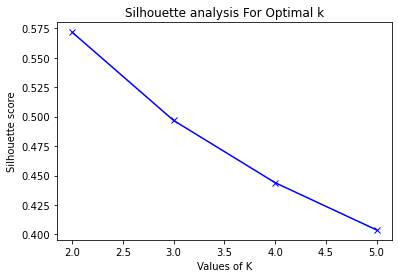

In [30]:
range_n_clusters = [2, 3, 4, 5]
silhouette_avg = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

### Conclusion 

- I have implemented the most popular unsupervised clustering technique called K-Means Clustering.
- I have applied the elbow method and found that k=2 (k is the number of clusters) can be considered a good number of clusters to cluster this data.
- I have achieved a classification accuracy of 47% with k=2 by our unsupervised model
- So, I have the value of k and found a relatively higher classification accuracy of 52% with k=2 after we have performed feature scaling on the data.
